<a href="https://colab.research.google.com/github/Negus25/Demo/blob/main/LeNet_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l==0.17.0
!pip install -U mxnet-cu101==1.7.0

     |████████████████████████████████| 83 kB 662 kB/s 
     |███████████████████████████████▌| 834.1 MB 1.5 MB/s eta 0:00:09tcmalloc: large alloc 1147494400 bytes == 0x5644b53aa000 @  0x7f53c664d615 0x56447b2c202c 0x56447b3a217a 0x56447b2c4e4d 0x56447b3b6c0d 0x56447b3390d8 0x56447b333c35 0x56447b2c673a 0x56447b338f40 0x56447b333c35 0x56447b2c673a 0x56447b33593b 0x56447b3b7a56 0x56447b334fb3 0x56447b3b7a56 0x56447b334fb3 0x56447b3b7a56 0x56447b334fb3 0x56447b2c6b99 0x56447b309e79 0x56447b2c57b2 0x56447b338e65 0x56447b333c35 0x56447b2c673a 0x56447b33593b 0x56447b333c35 0x56447b2c673a 0x56447b334b0e 0x56447b2c665a 0x56447b334d67 0x56447b333c35
     |████████████████████████████████| 846.0 MB 21 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [53]:
from IPython import display
from mxnet import autograd, gluon, np, npx
from d2l import mxnet as d2l

npx.set_np()

batch_size = 256
train_iter, test_iter = load_data_mnist(batch_size)

In [2]:
def load_data_mnist(batch_size, resize=None):  
    """Download the MNIST dataset and then load it into memory."""
    dataset = gluon.data.vision
    trans = [dataset.transforms.ToTensor()]
    if resize:
        trans.insert(0, dataset.transforms.Resize(resize))
    trans = dataset.transforms.Compose(trans)
    mnist_train = dataset.MNIST(train=True).transform_first(trans)
    mnist_test = dataset.MNIST(train=False).transform_first(trans)
    return (gluon.data.DataLoader(mnist_train, batch_size, shuffle=True),
            gluon.data.DataLoader(mnist_test, batch_size, shuffle=False))

(32, 1, 28, 28) float32 (32,) int32


In [37]:
batch_size = 256
train_iter, test_iter = load_data_mnist(batch_size=batch_size)

Initializing Model **Parameters**

In [38]:

K1 = np.random.normal(scale=0.01, size=(1, 6, 5, 5))
b1 = np.zeros(1)
K2 = np.random.normal(scale=0.01, size=(6, 6, 2, 2))
b2 = np.zeros(1)
K3 = np.random.normal(scale=0.01, size=(6, 16, 5, 5))
b3 = np.zeros(1)
K4 = np.random.normal(scale=0.01, size=(16, 16, 2, 2))
b4 = np.zeros(1)


W1 = np.random.normal(scale=0.01, size=(64, 120))
b5 = np.zeros(120)
W2 = np.random.normal(scale=0.01, size=(120, 84))
b6 = np.zeros(84)
W3 = np.random.normal(scale=0.01, size=(84, 10))
b7 = np.zeros(10)
params = [K1, b1, K2, b2, K3, b3, K4, b4, W1, b5, W2, b6, W3, b7]

for param in params:
    param.attach_grad()

# Activation functions 

```
# This is formatted as code
```



In [39]:
def sigmoid(X):
    return 1/exp(-X)

In [ ]:
def avgpool2d(X,pool_size = (1,1), strides=(1,1)) ):
  p_h, p_w = pool_size
    Y = np.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i:i + p_h, j:j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i:i + p_h, j:j + p_w].mean()
    return Y


In [66]:
def corr2d(X, K, P = (0,0), S = (1,1)):  
    """Compute 2D cross-correlation."""
    h, w = K.shape
    p_h, p_w = P.shape
    s_h, s_w = S.shape
    Y = np.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

In [18]:
def corr2d_multi_in(X, K):
    # First, iterate through the 0th dimension (channel dimension) of `X` and
    # `K`. Then, add them together
    return sum(corr2d(x, k) for x, k in zip(X, K))

In [64]:
def corr2d_multi_in_out(X, K):
    # Iterate through the 0th dimension of `K`, and each time, perform
    # cross-correlation operations with input `X`. All of the results are
    # stacked together
    return (corr2d_multi_in(x, k) for x, k in zip(X, K))

**Defining the Model**

In [67]:
def net(X):
    H1 = sigmoid(corr2d_multi_in_out(X, K1) + b1)
    H2 = avgpool2d(H1,pool_size, strides) ) 
    H3 = sigmoid(corr2d_multi_in_out(H2, K4) + b3)
    H4 = avgpool2d(H1,pool_size, strides) ) 
    H4 = H4.reshape((-1, 64))
    H5 = sigmoid(np.dot(H4, W1) + b5)
    H6 = sigmoid(np.dot(H5, W2) + b6)

    return np.dot(H6, W3) + b7

SyntaxError: ignored

**Defining the Loss Function**

In [54]:
def cross_entropy(y_hat, y):
    return -np.log(y_hat[range(len(y_hat)), y])


**Training**

In [44]:
class Animator:  
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(self.axes[
            0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [23]:
class Accumulator: 
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [55]:
def train_epoch_ch3(net, train_iter, loss, updater):  
    """Train a model within one epoch (defined in Chapter 3)."""
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accumulator(3)
    if isinstance(updater, gluon.Trainer):
        updater = updater.step
    for X, y in train_iter:
        # Compute gradients and update parameters
        with autograd.record():
            y_hat = net(X)
            l = loss(y_hat, y)
        l.backward()
        updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.size)
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

In [65]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  
    """Train a model (defined in Chapter 3)."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [57]:
def accuracy(y_hat, y):  
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.astype(y.dtype) == y
    return float(cmp.astype(y.dtype).sum())
    

In [58]:
def evaluate_accuracy(net, data_iter):  
    """Compute the accuracy for a model on a dataset."""
    metric = Accumulator(2)  # No. of correct predictions, no. of predictions
    for X, y in data_iter:
        metric.add(accuracy(net(X), y), y.size)
    return metric[0] / metric[1]

In [59]:
loss = cross_entropy

In [60]:
def sgd(params, lr, batch_size):  
    """Minibatch stochastic gradient descent."""
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [61]:
lr = 0.1

def updater(batch_size):
    return sgd(params, lr, batch_size)

TypeError: ignored

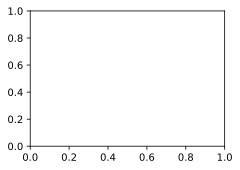

In [62]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)